In [12]:
!pip install tensorflow-datasets


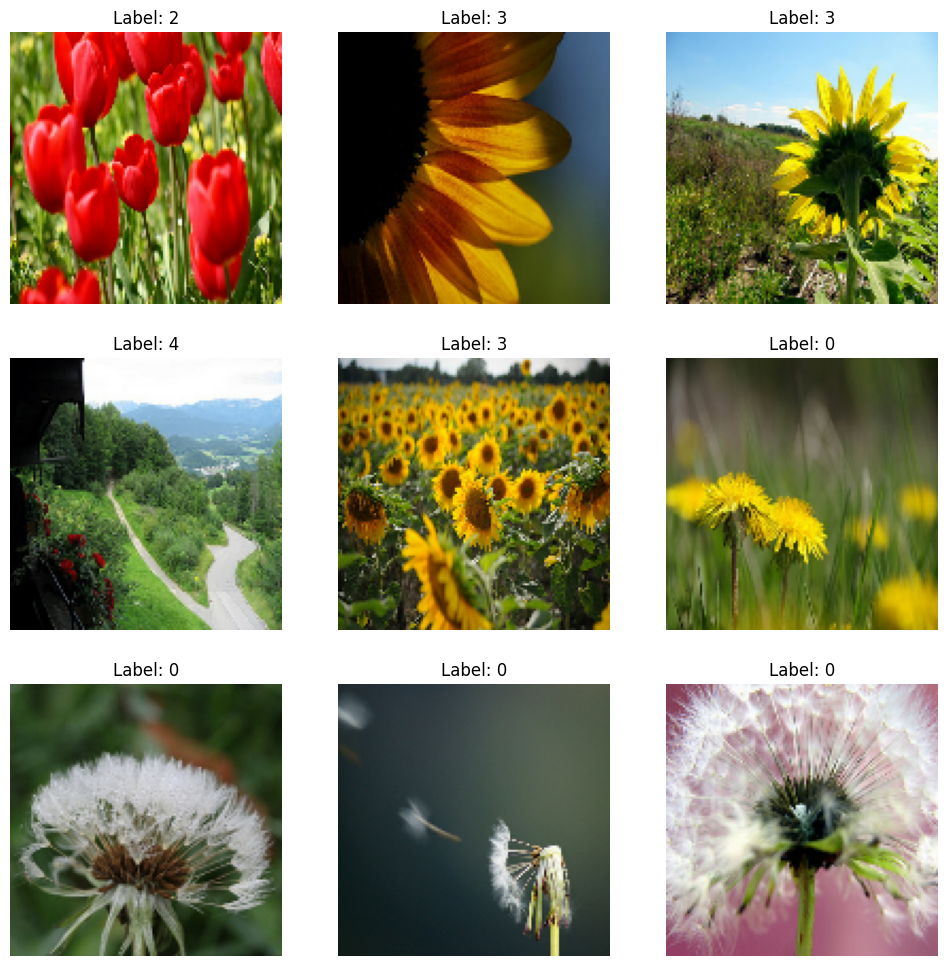

In [20]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load and split the dataset
(ds_train, ds_test), ds_info = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

# Resize and normalize function
def preprocess(image, label):
    image = tf.image.resize(image, (128, 128))  # Resize to 128x128
    image = tf.cast(image, tf.float32) / 255.0  # Normalize
    return image, label

# Apply preprocessing
ds_train = ds_train.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
# Show 9 sample images
plt.figure(figsize=(12, 12))
for images, labels in ds_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy())
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis('off')
plt.show()





In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(ds_train, validation_data=ds_test, epochs=10)


Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.3216 - loss: 1.9186 - val_accuracy: 0.5163 - val_loss: 1.1688
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 86s 940ms/step - accuracy: 0.5338 - loss: 1.1356 - val_accuracy: 0.5790 - val_loss: 1.0227
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.6627 - loss: 0.8868 - val_accuracy: 0.6049 - val_loss: 0.9532
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 125s 930ms/step - accuracy: 0.7754 - loss: 0.6353 - val_accuracy: 0.6294 - val_loss: 1.0934
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 137s 872ms/step - accuracy: 0.8464 - loss: 0.4530 - val_accuracy: 0.5981 - val_loss: 1.2782
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 81s 878ms/step - accuracy: 0.8849 - loss: 0.3390 - val_accuracy: 0.6090 - val_loss: 1.2559
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 83s 893ms/step - accuracy: 0.9328 - loss: 0.2330 - val_accuracy: 0.5817 - val_loss: 1.6036
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 141s 884ms/step - accuracy: 0.9388 - loss: 0.1937 - val_accura

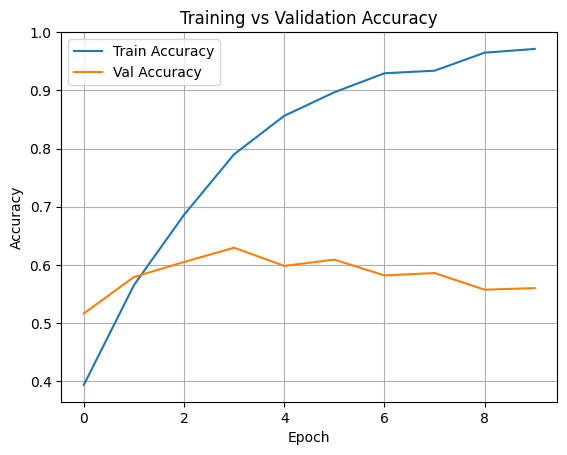

In [18]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


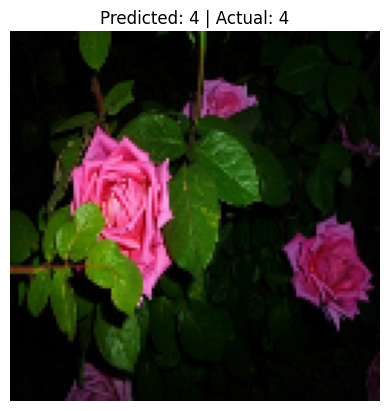

In [19]:

for images, labels in ds_test.take(1):
    image = images[0]
    label = labels[0]
    pred = model.predict(tf.expand_dims(image, 0))
    predicted_class = tf.argmax(pred[0])

    plt.imshow(image)
    plt.title(f"Predicted: {predicted_class.numpy()} | Actual: {label.numpy()}")
    plt.axis('off')
    plt.show()
    break
